# Decision Tree

A **decision tree** is a non-parametric supervised learning algorithm that is used for both **regression** and **classification** tasks. It is a tree-like model that represents decisions and their possible consequences using a tree structure.

In decision tree algorithms, the choice of the splitting criterion is crucial for building an accurate and effective model. Two commonly used splitting criteria are **Information gain** and **Gini impurity**.

**Information gain** measures the reduction in entropy, which is a measure of the amount of uncertainty or randomness in a dataset. The information gain of a node is calculated as follows:

**Gini impurity** measures the degree of impurity or randomness in a dataset. In the context of decision trees, it represents the probability of misclassifying a randomly chosen data point in a given node. The Gini impurity of a node is calculated as follows:

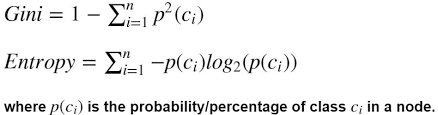

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
import seaborn as sns

## 2. Importing Data

In [2]:
data= pd.read_csv('Datasets/Iris.csv')
data = data[["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]]
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## 3. Visualizing Dataset

We shall now examine **Iris-setosa**, **Iris-versicolor** and **Iris-virginica** by examining their **SepalLengthCm** and **PetalLengthCm**

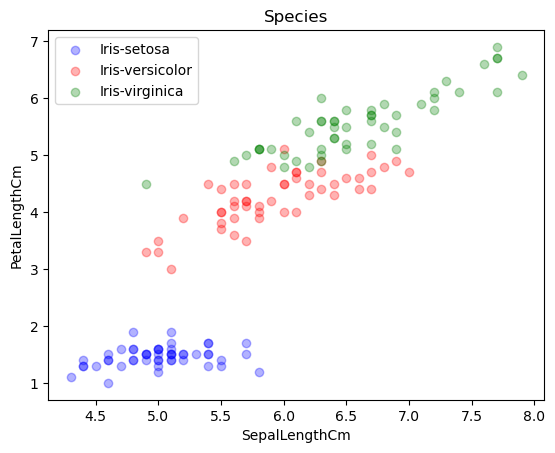

In [3]:
M=data[data.Species=='Iris-setosa']
B=data[data.Species=='Iris-versicolor']
D=data[data.Species=='Iris-virginica']
mtp.title("Species")
mtp.xlabel("SepalLengthCm")
mtp.ylabel("PetalLengthCm")

mtp.scatter( M.SepalLengthCm, M.PetalLengthCm, color = "Blue", label = "Iris-setosa", alpha = 0.3)
mtp.scatter(B.SepalLengthCm, B.PetalLengthCm,  color = "Red", label = "Iris-versicolor", alpha = 0.3)
mtp.scatter( D.SepalLengthCm, D.PetalLengthCm, color = "Green", label = "Iris-virginica", alpha = 0.3)
mtp.legend()
mtp.show()

## 4. Data Cleaning

In [4]:
# Remove duplicate rows
data = data.drop_duplicates()

## 5. Data Preprocessing

Now, Split the Dataframe into x and y components. x includes all independent predictor factors and y provides the Species

In [5]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1,1)

###  Data Normalization

**Normalize** the data to maximize the **Model's Efficiency**

In [6]:
x = (x - np.min(x,axis=0)) / (np.max(x,axis=0) - np.min(x,axis=0))

## 6. Data Splitting

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

## 7. Training Model

## 7.1 Information Gain Model

In [8]:
from sklearn.tree import DecisionTreeClassifier

# create the decision tree classifier object with the Information Gain model
clf1 = DecisionTreeClassifier(criterion='entropy')

# fit the classifier to the training data
clf1.fit(x_train, y_train)

# make predictions on the test data
y_pred1 = clf1.predict(x_test)

## 7.2 Gini Impurity Model

In [9]:
from sklearn.tree import DecisionTreeClassifier

# create the decision tree classifier object with the Gini impurity model
clf2 = DecisionTreeClassifier(criterion='gini')

# fit the classifier to the training data
clf2.fit(x_train, y_train)

# make predictions on the test data
y_pred2 = clf2.predict(x_test)

## 7.3 Implemented  Decision Tree 

###  Node Class

In [10]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

### Tree Class

In [11]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [12]:
clf3 = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
clf3.fit(x_train,y_train)
y_pred3 = clf3.predict(x_test)

## 8. Visualization

In [13]:
feature_names = list(data.columns[:-1])  
target_names = data.columns[-1]
class_names = [str(name) for name in target_names]

### Decision Tree from Information Gain

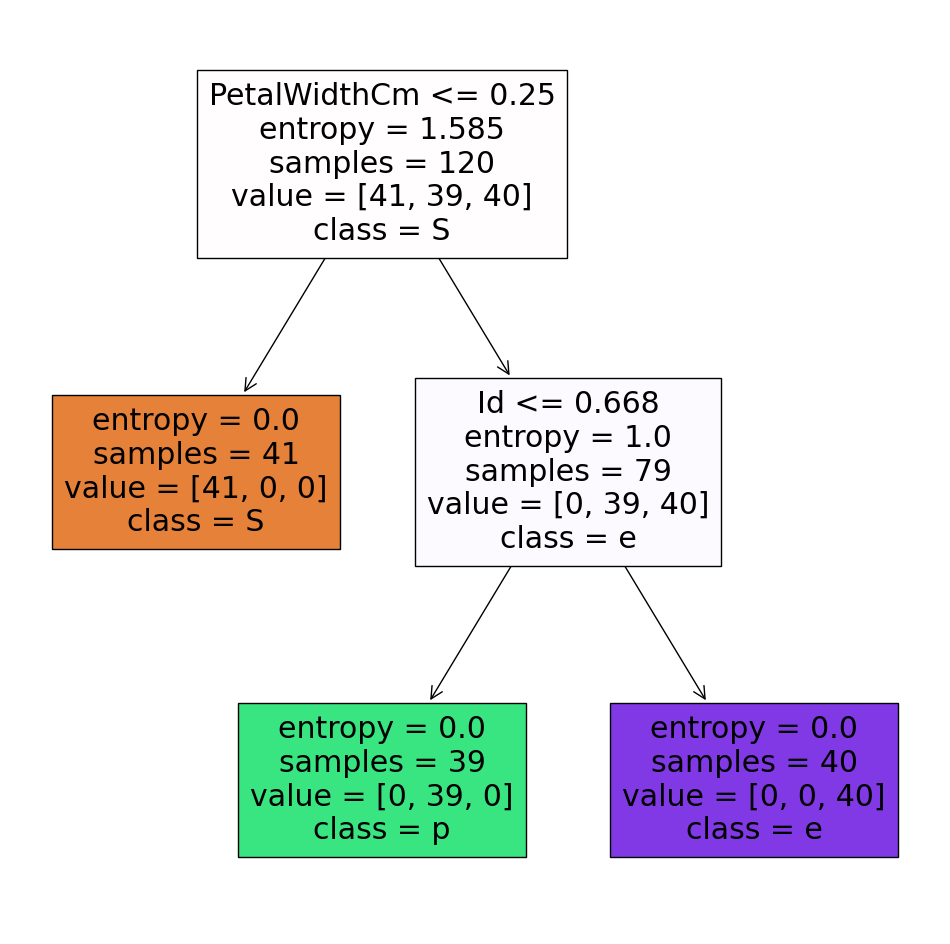

In [14]:
from sklearn.tree import plot_tree

fig, ax = mtp.subplots(figsize=(12, 12))
plot_tree(clf1, feature_names=feature_names, class_names=class_names, filled=True, ax=ax)
mtp.savefig('decision_tree_info.png')

### Decision Tree from Gini Impurity

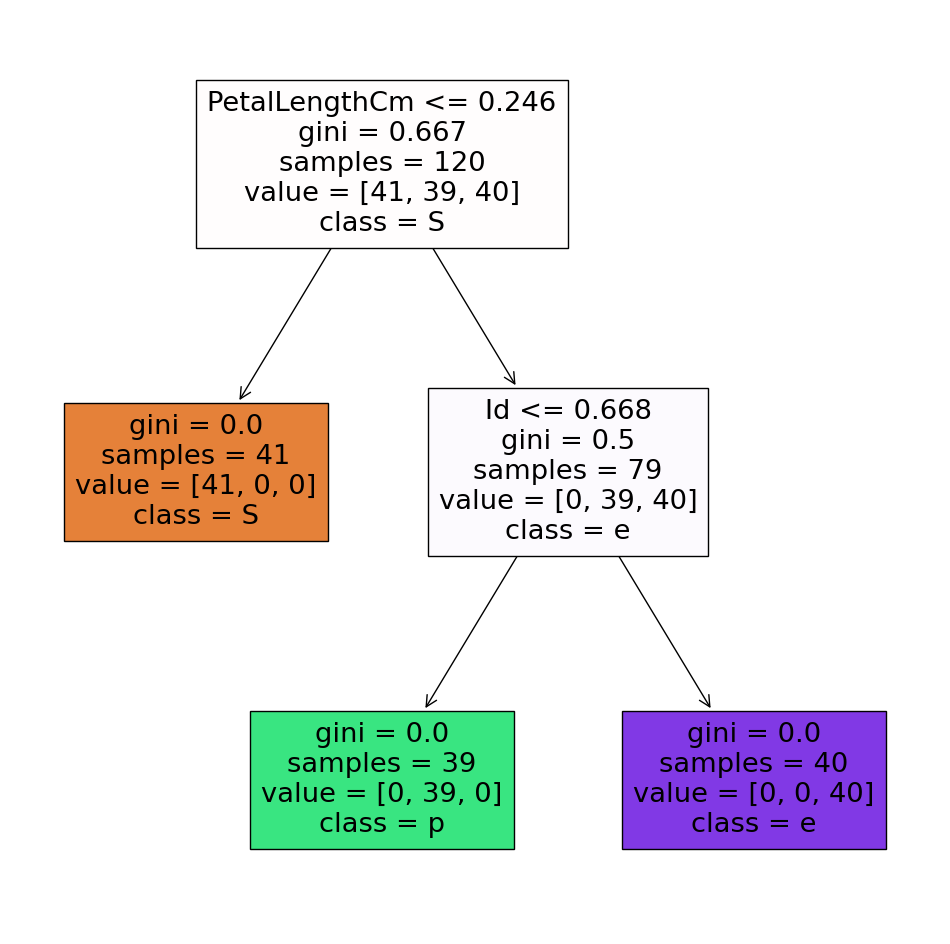

In [15]:
from sklearn.tree import plot_tree

fig, ax = mtp.subplots(figsize=(12, 12))
plot_tree(clf2, feature_names=feature_names, class_names=class_names, filled=True, ax=ax)
mtp.savefig('decision_tree_gini.png')

## 9. Evaluation of Performance

### Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix (Information Gain)')

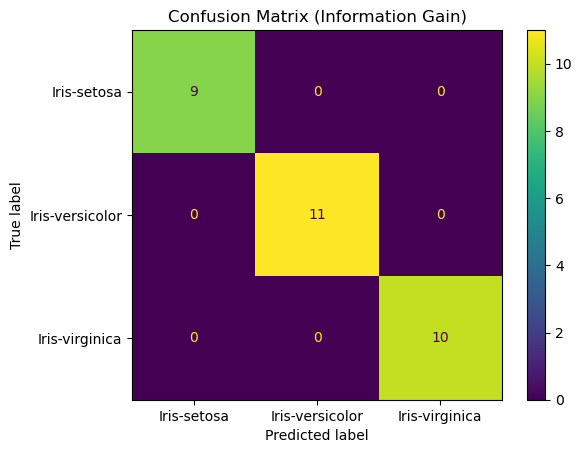

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for Information Gain
cm1 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
ax = cm1.ax_
ax.set_title("Confusion Matrix (Information Gain)")

Text(0.5, 1.0, 'Confusion Matrix (Gini Impurity)')

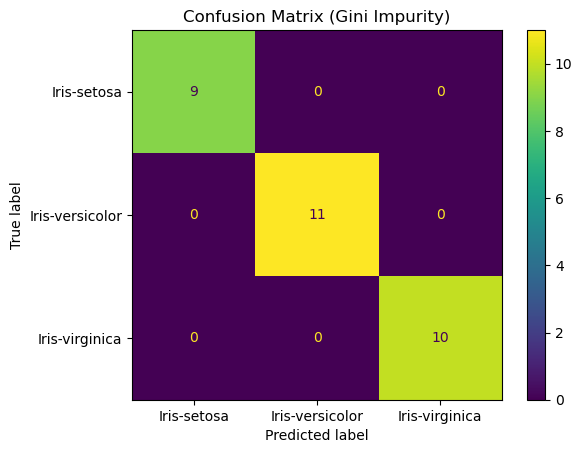

In [17]:
# Plot confusion matrix for Gini Impurity
cm2 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
ax = cm2.ax_
ax.set_title("Confusion Matrix (Gini Impurity)")

Text(0.5, 1.0, 'Confusion Matrix (Implemented Model)')

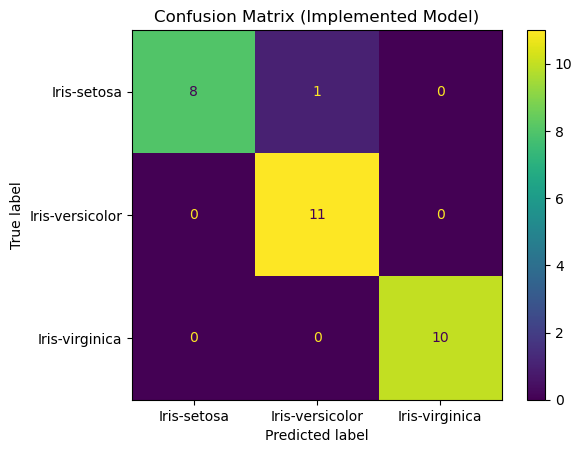

In [18]:
# Plot confusion matrix for Implemented Model
cm3 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred3)
ax = cm3.ax_
ax.set_title("Confusion Matrix (Implemented Model)")

### Accuracy

It measures the proportion of correct predictions made by the model among all predictions made.

In [19]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)

print("Accuracy for Information Gain Model: {:.4f}".format(accuracy1))
print("Accuracy for Gini Impurity Model: {:.4f}".format(accuracy2))
print("Accuracy for Implemented Model: {:.4f}".format(accuracy3))

Accuracy for Information Gain Model: 1.0000
Accuracy for Gini Impurity Model: 1.0000
Accuracy for Implemented Model: 0.9667


### Precision

It measures the proportion of true positive predictions among all positive predictions made by the model.

In [20]:
from sklearn.metrics import precision_score

precision1 = precision_score(y_test, y_pred1, average='weighted')
precision2 = precision_score(y_test, y_pred2, average='weighted')
precision3 = precision_score(y_test, y_pred3, average='weighted')

print("Precision for Information Gain Model: {:.4f}".format(precision1))
print("Precision for Gini Impurity Model: {:.4f}".format(precision2))
print("Precision for Implemented Model: {:.4f}".format(precision3))

Precision for Information Gain Model: 1.0000
Precision for Gini Impurity Model: 1.0000
Precision for Implemented Model: 0.9694


### Recall

It measures the proportion of true positive predictions among all actual positive instances in the dataset.

In [21]:
from sklearn.metrics import recall_score

recall1 = recall_score(y_test, y_pred1, average='weighted')
recall2 = recall_score(y_test, y_pred2, average='weighted')
recall3 = recall_score(y_test, y_pred3, average='weighted')

print("Recall for Information Gain Model: {:.4f}".format(recall1))
print("Recall for Gini Impurity Model: {:.4f}".format(recall2))
print("Recall for Implemented Model: {:.4f}".format(recall3))

Recall for Information Gain Model: 1.0000
Recall for Gini Impurity Model: 1.0000
Recall for Implemented Model: 0.9667
